# Data Exploration and Cleaning

In [17]:
import numpy as np
import pandas as pd
import os

In [22]:
titanic_train = pd.read_csv("C:/Users/User/OneDrive/Masaüstü/titanic/train.csv")
#veri setimizi okuduk.


In [26]:
titanic_train.shape #veri setinin boyutunu öğrenmek için kullanırız. column ve row boyutları gelir.

(891, 12)

In [24]:
titanic_train.head(5) #5 satırı gösterir.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
categorical = titanic_train.dtypes[titanic_train.dtypes== "object"].index
print(categorical)
titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [28]:
titanic_train["Ticket"][1:10]

1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [29]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [30]:
del titanic_train["PassengerId"]

In [33]:
new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered = True) #sıralı gelir
new_Pclass = new_Pclass.rename_categories(["class1","class2","class3"]) #class isimlerini değiştiriyoruz.

new_Pclass.describe()

,counts,freqs
categories,,
class1,216,0.242424
class2,184,0.206510
class3,491,0.551066


In [34]:
titanic_train["Pclass"] = new_Pclass

In [35]:
titanic_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [41]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
missing= np.where(titanic_train["Age"].isnull()== True)
missing #age sütunundaki eksik değerleri gösterir. 

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [44]:
len(missing[0]) #177 tane eksik değer varmış

177

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

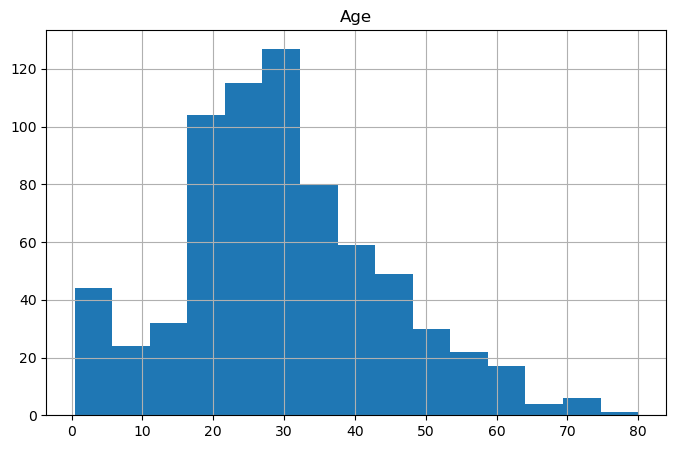

In [50]:
titanic_train.hist(column="Age",figsize=(8,5), bins= 15)

In [39]:
char_cabin = titanic_train["Cabin"].astype(str) 
new_Cabin = np.array([cabin[0] for cabin in char_cabin])
new_Cabin = pd.Categorical(new_Cabin)
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [40]:
titanic_train["Cabin"] = new_Cabin

In [51]:
new_age =np.where(titanic_train["Age"].isnull(), 25, titanic_train["Age"])
titanic_train["Age"] = new_age #boş değerlere 25 değerini verince tüm değerler dolmuş oldu.
titanic_train["Age"].describe()

count    891.000000
mean      28.765623
std       13.136649
min        0.420000
25%       22.000000
50%       25.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64